In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import datetime
import math
import matplotlib as plt
import scipy as sp
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
from cvxopt import matrix
from cvxopt import solvers
from math import sqrt
from cvxopt.blas import dot
from cvxopt.solvers import qp, options

In [2]:
daily_data = pd.read_excel('StockPrice_set_2.xlsx', header = [0, 1])
daily_data

ATVI                                  ADBE                      \
           Adj Open Adj High  Adj Low Adj Close  Adj Open  Adj High   Adj Low   
Date                                                                            
2005-01-03   5.1539   5.1743   4.9697    5.0209   31.4941   31.7440   30.7692   
2005-01-04   5.0720   5.0720   4.8163    4.8904   31.0992   31.1841   29.6744   
2005-01-05   4.8342   5.0004   4.8214    4.9621   30.0444   30.4443   29.8594   
2005-01-06   4.9621   4.9979   4.8828    4.8930   30.1093   30.1643   29.2395   
2005-01-07   4.9032   4.9211   4.6986    4.7293   29.6344   29.7494   28.8446   
2005-01-10   4.6551   4.8393   4.6347    4.7728   29.3945   29.8444   29.3145   
2005-01-11   4.8214   5.1257   4.7728    5.1027   29.4345   29.4945   28.9696   
2005-01-12   5.1155   5.1385   4.9876    5.0516   29.2345   29.5644   28.8296   
2005-01-13   5.0490   5.4787   5.0286    5.4173   29.5994   29.6894   28.9746   
2005-01-14   5.4557   5.6885   5.4557    5.5938   29.3345   29.3645   28.8996   
2005-01-18   5.5989   5.7166   5.5350    5.6859   29.0245   29.2745   28.2947   
2005-01-19   5.6654   5.7012   5.4480    5.5222   29.1545   29.4445   28.8696   
2005-01-20   5.5350   5.5350   5.3943    5.4813   28.8596   29.5494   28.7446   
2005-01-21   5.4864   5.5682   5.4224    5.5069   29.1395   29.1895   28.4946   
2005-01-24   5.5427   5.5529   5.3457    5.3790   28.6646   28.8296   27.6198   
2005-01-25   5.3713   5.4838   5.3713    5.4608   27.8898   28.4197   27.7548   
2005-01-26   5.4992   5.6833   5.4480    5.6552   28.0747   28.2297   27.6698   
2005-01-27   5.6808   5.7294   5.6040    5.6757   28.1647   28.1847   27.6748   
2005-01-28   5.7089   5.7089   5.5401    5.6450   28.2647   28.2647   27.3949   
2005-01-31   5.6961   5.7984   5.6271    5.7805   28.0947   28.6596   27.9248   
2005-02-01   5.8036   5.8061   5.6910    5.7345   28.4447   29.1795   28.4447   
2005-02-02   5.9417   6.0900   5.8828    6.0184   29.8444   31.2641   29.8194   
2005-02-03   5.9340   6.0107   5.8828    5.9979   30.7942   31.7340   30.6492   
2005-02-04   5.9979   6.0875   5.9698    6.0849   31.5091   31.9940   31.2841   
2005-02-07   6.0491   6.2051   6.0491    6.1540   31.9690   31.9690   31.5041   
2005-02-08   6.1847   6.3816   6.1361    6.3125   31.7840   32.1890   31.6191   
2005-02-09   6.3125   6.3279   6.0875    6.1130   31.9740   32.0690   31.1092   
2005-02-10   5.3585   5.4455   5.1488    5.2204   31.4391   31.5591   30.9342   
2005-02-11   5.1897   5.3380   5.0286    5.2920   31.4641   32.1990   31.1741   
2005-02-14   5.2281   5.4966   5.2178    5.4787   31.6191   31.9840   31.4691   
...             ...      ...      ...       ...       ...       ...       ...   
2018-08-30  74.4000  75.7700  73.6000   74.1000  266.7200  269.0500  265.5000   
2018-08-31  71.5200  72.4500  71.0100   72.1000  265.5500  266.8331  263.2000   
2018-09-04  72.1300  73.0400  72.0300   72.9800  263.6700  266.9300  262.3000   
2018-09-05  72.9300  73.1800  70.9950   71.6500  265.6100  266.1597  254.5400   
2018-09-06  71.6300  72.4300  71.1500   71.9600  256.9500  260.2700  255.1400   
2018-09-07  71.8300  73.7100  71.8100   73.5700  258.0000  263.6700  257.1200   
2018-09-10  73.8800  74.7300  73.2500   74.2600  264.2700  265.9300  260.7900   
2018-09-11  74.8800  79.5400  74.6600   79.5000  265.3000  268.6000  263.3100   
2018-09-12  79.7000  81.4900  78.8000   80.5200  267.8300  270.9400  266.4480   
2018-09-13  80.5900  81.4000  79.8301   80.4300  267.1300  270.0000  265.0100   
2018-09-14  80.5000  82.0300  80.4300   81.2700  269.0000  277.6100  268.0000   
2018-09-17  81.4900  81.8800  78.6600   78.8800  275.0000  275.7800  267.6800   
2018-09-18  78.8200  80.3800  78.8200   79.6300  267.6100  273.7800  266.6033   
2018-09-19  79.9300  80.1300  78.5200   79.5800  271.1400  271.9500  263.6139   
2018-09-20  79.9100  81.0400  79.3450   80.6500  266.4700  269.5400  264.1892   
2018-09-21  81.3300  81.3300  80.2500   80.290

In [3]:
weekly_last = daily_data.groupby(pd.Grouper(freq = 'W')).last()
weekly_last

ATVI                                  ADBE                      \
           Adj Open Adj High  Adj Low Adj Close  Adj Open  Adj High   Adj Low   
Date                                                                            
2005-01-09   4.9032   4.9211   4.6986    4.7293   29.6344   29.7494   28.8446   
2005-01-16   5.4557   5.6885   5.4557    5.5938   29.3345   29.3645   28.8996   
2005-01-23   5.4864   5.5682   5.4224    5.5069   29.1395   29.1895   28.4946   
2005-01-30   5.7089   5.7089   5.5401    5.6450   28.2647   28.2647   27.3949   
2005-02-06   5.9979   6.0875   5.9698    6.0849   31.5091   31.9940   31.2841   
2005-02-13   5.1897   5.3380   5.0286    5.2920   31.4641   32.1990   31.1741   
2005-02-20   5.5401   5.5964   5.4864    5.5069   31.7940   31.8440   31.3791   
2005-02-27   5.5810   5.6399   5.5555    5.6143   30.7292   30.8592   30.2943   
2005-03-06   5.8828   5.9084   5.7089    5.9084   31.5441   32.0940   31.2691   
2005-03-13   5.7959   5.8905   5.7959    5.8777   32.6889   32.8438   31.9390   
2005-03-20   5.9084   5.9468   5.8649    5.8956   32.6439   34.1436   32.1240   
2005-03-27   5.8351   5.8624   5.6202    5.6271   33.6300   33.6750   33.2700   
2005-04-03   5.1155   5.2622   5.0712    5.2588   33.9100   34.2550   33.1550   
2005-04-10   5.3679   5.4156   5.2860    5.3235   34.2450   34.3000   33.5300   
2005-04-17   5.2178   5.4020   5.2008    5.2588   31.3750   31.5500   30.3100   
2005-04-24   5.1633   5.1667   4.9484    4.9893   29.6500   30.2500   29.3400   
2005-05-01   4.9552   5.0303   4.8359    4.9314   29.5250   29.9050   29.0650   
2005-05-08   5.0575   5.5077   5.0473    5.4259   28.7650   28.9800   28.4700   
2005-05-15   5.2417   5.2894   5.0916    5.1496   29.0300   29.1500   28.6950   
2005-05-22   5.3167   5.4088   5.2178    5.3372   31.0000   31.2400   30.8350   
2005-05-29   5.1974   5.2826   5.1735    5.2451   33.1500   33.3200   32.9000   
2005-06-05   5.3679   5.4224   5.2997    5.3235   32.9000   33.0000   32.3900   
2005-06-12   5.7942   5.9067   5.7191    5.8487   32.5900   32.6900   29.9000   
2005-06-19   5.9749   6.0431   5.9374    5.9886   31.1800   31.3400   30.6000   
2005-06-26   5.9681   5.9852   5.7294    5.7533   29.9500   30.0900   29.1684   
2005-07-03   5.6885   5.6885   5.5827    5.5930   28.7400   28.8200   28.3600   
2005-07-10   5.8658   5.9681   5.7976    5.9135   27.6600   28.0200   27.1800   
2005-07-17   6.1454   6.2784   6.1454    6.1591   29.2500   29.3700   28.6500   
2005-07-24   6.2580   6.2955   6.2239    6.2921   29.6200   29.8000   29.3800   
2005-07-31   6.3910   7.0526   6.3842    6.9401   30.1400   30.4000   29.5400   
...             ...      ...      ...       ...       ...       ...       ...   
2018-03-25  69.5018  70.1584  67.6712   67.6911  219.5200  222.4550  214.7800   
2018-04-01  66.3400  68.0100  64.9200   67.4600  213.3500  219.5900  210.2737   
2018-04-08  65.8500  66.3600  64.1300   64.5600  221.8900  224.4600  216.7471   
2018-04-15  67.4600  67.5900  65.2900   65.8800  228.8500  228.9500  222.5500   
2018-04-22  67.4400  67.4700  65.9600   66.3000  227.0000  227.6000  223.0500   
2018-04-29  66.6900  67.3000  65.5100   65.7900  223.0800  224.1800  219.6800   
2018-05-06  66.3000  69.9200  66.0228   69.8400  223.8900  229.3900  223.3900   
2018-05-13  72.7700  72.7800  71.2700   71.7000  241.0300  241.9300  238.7901   
2018-05-20  71.5200  72.1400  71.0500   71.9900  236.2400  239.2800  235.2581   
2018-05-27  70.6600  71.8100  70.6000   71.4600  245.0000  245.7900  242.8700   
2018-06-03  71.4200  73.2100  70.7700   73.0300  250.5500  251.8300  248.8486   
2018-06-10  73.4500  74.8300  73.4500   74.2900  246.8600  251.6600  245.8300   
2018-06-17  77.6600  77.8300  76.3700   77.4100  251.2800  253.8700  247.5200   
2018-06-24  76.4600  76.5600  75.2150   75.9800  248.1100  248.7999  243.2600   
2018-07-01  76.4400  77.2400  76.0800   76.3200  241.8800  245.4900  241.5000   
2018-07-08  76.2000  77.4800  76.0200   77.190

In [4]:
#tuning
titlesx = weekly_last.columns.levels
ticker = list(titlesx[0])
print(ticker)

int_capital = 10300
pos_num = len(ticker)

size = 5

['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'ALGN', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BKNG', 'BMRN', 'CA', 'CDNS', 'CELG', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'CTRP', 'CTSH', 'CTXS', 'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA', 'GILD', 'GOOG', 'GOOGL', 'HAS', 'HOLX', 'HSIC', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JBHT', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MELI', 'MNST', 'MSFT', 'MU', 'MXIM', 'MYL', 'NFLX', 'NTES', 'NVDA', 'ORLY', 'PAYX', 'PCAR', 'PEP', 'PYPL', 'QCOM', 'QRTEA', 'REGN', 'ROST', 'SBUX', 'SHPG', 'SIRI', 'SNPS', 'STX', 'SWKS', 'SYMC', 'TMUS', 'TSLA', 'TTWO', 'TXN', 'ULTA', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'WDC', 'WYNN', 'XLNX', 'XRAY']


In [5]:
#Performace
def performance_matrics(port_value, output = False):

    #annual volatility
    ann_vol = (port_value.pct_change().std()) * np.sqrt(252)
    port_return = pd.DataFrame(index = port_value.index[:], columns=['Values'])
    port_return['Values'] = port_value.pct_change()

    #cumulative return series & max drawdown, max drawdown duration
    port_cum_series= pd.DataFrame(index = port_return.index[:], 
                                  columns=['CumulativeReturn','WaterMark','Drawdown','Dwn_Duration'])

    for i in range(len(port_return)):
        if i == 0:
            port_cum_series['CumulativeReturn'].iloc[i] = 0
            port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
        else:
            port_cum_series['CumulativeReturn'].iloc[i] = (1 + port_return['Values'].iloc[i]) * (1 + port_cum_series['CumulativeReturn'].iloc[i-1]) - 1
            if port_cum_series['CumulativeReturn'].iloc[i] > port_cum_series['WaterMark'].iloc[i-1]:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
            else:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['WaterMark'].iloc[i-1]  

        port_cum_series['Drawdown'].iloc[i] = ((1 + port_cum_series['WaterMark'].iloc[i]) - (1 + port_cum_series['CumulativeReturn'].iloc[i])) / (1 + port_cum_series['WaterMark'].iloc[i])
        if i == 0:
            port_cum_series['Dwn_Duration'].iloc[i] = 0
        else:
            if port_cum_series['Drawdown'].iloc[i] != 0:
                port_cum_series['Dwn_Duration'].iloc[i] = port_cum_series['Dwn_Duration'].iloc[i-1] + 1
            else:
                port_cum_series['Dwn_Duration'].iloc[i] = 0 


    max_drawdown = port_cum_series['Drawdown'].max()
    max_dwn_duration = port_cum_series['Dwn_Duration'].max()
    total_return = port_value.iloc[-1]/port_value.iloc[0] - 1 
    
    #annual return
    ann_return = (1 + total_return) ** (1 / float((len(port_value)) / 252.0)) - 1 

    #sharpe ratio
    sharpe_ratio = (ann_return) / ann_vol

    print('annual volatility:{}'.format(ann_vol.iloc[0]))
    print('annual return:{}'.format(ann_return.iloc[0]))
    print('sharpe ratio:{}'.format(sharpe_ratio.iloc[0]))
    print('max drawdown:{}'.format(max_drawdown))
    print('max down duration:{} days'.format(max_dwn_duration))

#Moving Average  
def MA(df, n):  
    MA = df.rolling(n).mean()
    MA.columns = df.columns
    return MA

#Bollinger Bands  
def BBANDS(df):  
    MA = df.rolling(13).mean() 
    MSD = df.rolling(13).std()
    ub1 =  MA + 2 * MSD
    uB1 = pd.DataFrame(ub1, index = df.index, columns = df.columns)  
    lb1 =  MA - 2 * MSD
    lB1 = pd.DataFrame(lb1, index = df.index, columns = df.columns)  
    b2 = (df - MA + 2 * MSD) / (2 * 2 * MSD)  
    B2 = pd.DataFrame(b2, index = df.index, columns = df.columns)  
    BBAND = pd.concat([MA, uB1, lB1, B2], keys = ['Mean', 'UpperBand', 'LowerBand', '%B'], axis = 1)
    return BBAND

#Average True Range  
def ATR(df, n, H_price_name='High', L_price_name='Low', C_price_name='Close'):  
    i = 0  
    TR_l = [0]  
    while i < len(df.index)-1:  
        TR = max(df[H_price_name][i+1], df[C_price_name][i]) - min(df[L_price_name][i+1], df[C_price_name][i])  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l,index = df.index)  
    ATR = pd.DataFrame(TR_s.ewm(span = n, min_periods = n).mean(), columns = ['ATR_%s' % n])
    return ATR

#Momentum
def M(df, n,ticker):
    momentum= pd.DataFrame(data = np.zeros((len(df), len(ticker))), index = df.index[:], columns = ticker)
    M = df.diff(n)
    for p in range(0, len(ticker)):
        for i in range(0, len(df)):
             if math.isnan(M.iloc[i,p]) == False: 
                if M.iloc[i,p]>0:
                    momentum.iloc[i, p] = 1
    return momentum

#Keltner Channel  
def KELCH(df, H_price_name='High', L_price_name='Low', C_price_name='Close'):  
    KelChM = pd.Series(df[C_price_name].rolling(13).mean())
    ATR_value = ATR(df, 13 , H_price_name, L_price_name, C_price_name)['ATR_%s' % 13]
    KelChU = KelChM + 2 * ATR_value
    KelChD = KelChM - 2 * ATR_value

    KEL = pd.concat([KelChU, KelChM, KelChD], keys = ['KelChU', 'KelChM', 'KelChD'], axis = 1) 
    return KEL

#Keltner Channel  
def SQUEEZE(df, k, H_price_name='High', L_price_name='Low', C_price_name='Close'):  
    
    BBAND = BBANDS(df[[C_price_name]])
    BBAND.columns = BBAND.columns.get_level_values(0)
    UB_B = BBAND['UpperBand']
    LB_B = BBAND['LowerBand']
    
    KEL = KELCH(df , H_price_name, L_price_name, C_price_name)
    UB_K = KEL['KelChU']
    LB_K = KEL['KelChD']
    
    check = pd.concat([BBAND, KEL], axis = 1)
  
    Signal = pd.DataFrame(((UB_B < UB_K) & (LB_B > LB_K)).astype(int), columns = [k])
    

    return Signal, check

def RSI(df,k, H_price_name='High', L_price_name='Low'):   
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i + 1 <= len(df.index)-1:  
        UpMove = df[H_price_name][i + 1] - df[H_price_name][i]  
        DoMove = df[L_price_name][i] - df[L_price_name][i+1]
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD) 
        i = i + 1  
    UpI = pd.DataFrame(UpI,index = df.index)  
    DoI = pd.DataFrame(DoI, index = df.index)  
    PosDI = pd.DataFrame(UpI.ewm(span = 13, min_periods = 13 - 1).mean())  
    NegDI = pd.DataFrame(DoI.ewm(span = 13, min_periods = 13 - 1).mean())  
    RSI = 100.0 - 100.0 / (1 + (PosDI /NegDI))
    RSI.columns = [k]
    return RSI
#nearhigh
def nearNhigh (df,n,ticker):
    vol=0
    Nhigh_info=pd.DataFrame(data = np.zeros((len(df), len(ticker))), index = df.index[:], columns = ticker)
    for p in range(len(ticker)):
        for i in range(52,len(df)):
            vol = (df[ticker[p]][i-52:i].pct_change().std())*np.sqrt(52)
            k= df[ticker[p]][i-52:i].max()
            if k<=df.iloc[i-1,p] and df.iloc[i-1,p] != 0:
                Nhigh_info.iloc[i,p]=1
    return Nhigh_info

def covariance_matrix(target_port,present_timing_index_week):
    t = present_timing_index_week
    jj = pd.DataFrame(columns=target_port)
    cov_mat = pd.DataFrame(columns=target_port)
    for ti in target_port:
        jj['%s'%ti] = total_daily_adj_pctchange['%s'%ti][(t+1)*5-4:(t+1)*5] #這裡時間的設定基本上要跟下面時間的設定一樣
    cov_mat = jj.astype(float).cov()
    cov_mat = cov_mat.values   #把這行註解掉，就會輸出成Dataframe，可以至少看得出來是一個矩陣，不然輸出成array像下面那樣真的很醜。 
    return cov_mat

def expect_performance(target_port,present_timing_index_week): # It is still not settled that past data can represent expected performance.
    t = present_timing_index_week
    stat = ['Mean','Variance','STDev']
    port_performance = pd.DataFrame(columns=target_port,index=stat)
    for pup in target_port:
        port_performance['%s'%pup][0]=total_daily_adj_pctchange['%s'%pup][(t+1)*5-4:(t+1)*5].mean()  #這裡時間設定該週資料
        port_performance['%s'%pup][1]=total_daily_adj_pctchange['%s'%pup][(t+1)*5-4:(t+1)*5].var() 
        port_performance['%s'%pup][2]=total_daily_adj_pctchange['%s'%pup][(t+1)*5-4:(t+1)*5].std()
    return port_performance

 #Define QP parameters (with NumPy)
def QP(bb):
    G= matrix(0.0, (len(bb)+1,len(bb)))
    for i in range (0,(len(bb))):
        G[i,i]=-1
        G[len(bb),i]=1

    h= matrix(0.0, (len(bb)+1,1))
    h[len(bb),0]=1.0

    P=matrix(hh)

    q= matrix (0.0, (len(bb),1)) 
    A= matrix(0.0, (1,len(bb)))
    for i in range (0,len(bb)):
        A[0,i]=kk.iloc[0,i]+ 2*kk.iloc[2,i] #因為我們squeeze是判斷是否盤整，故預期報酬率我們增加兩個standard deviation
    
    b=matrix(0.02)
    sol=solvers.qp(P,q,G,h,A,b)
    return sol

In [6]:
total_adj=pd.DataFrame()
for symbol in ticker:
    symbol_data=weekly_last['%s'%symbol]
    symbol_data.index=pd.to_datetime(symbol_data.index).tolist()
    symbol_adj=symbol_data[['Adj Close']]
    symbol_adj.columns=[symbol]
    total_adj=pd.concat([total_adj,symbol_adj],axis=1)
display(total_adj)

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMGN,...,ULTA,VOD,VRSK,VRTX,WBA,WDAY,WDC,WYNN,XLNX,XRAY
2005-01-09,NaN,4.3836,29.3845,25.1440,23.9662,34.2822,10.28,5.9325,12.6800,53.5568,...,NaN,21.0146,NaN,10.49,33.4859,NaN,8.6677,38.7149,20.1002,25.1849
2005-01-16,NaN,4.4437,29.1095,25.2077,23.8537,31.6636,10.28,5.6625,12.9784,54.2712,...,NaN,20.2272,NaN,10.52,33.5908,NaN,8.9681,38.0749,19.5045,25.6341
2005-01-23,NaN,4.4621,28.5296,24.3802,24.0956,31.3038,10.24,5.8350,12.2403,53.2165,...,NaN,20.0805,NaN,10.20,34.0669,NaN,8.8479,36.4516,20.1149,25.6110
2005-01-30,NaN,4.6830,27.7348,24.5711,24.3038,28.5452,8.76,6.1575,12.5936,52.1364,...,NaN,20.1422,NaN,10.05,34.5914,NaN,8.9938,36.5796,21.1740,26.3520
2005-02-06,NaN,4.9906,31.9890,26.5374,24.8382,31.3437,7.99,6.7250,13.1825,53.3696,...,NaN,20.2658,NaN,11.30,35.6403,NaN,9.9378,40.4371,21.6814,26.7317
2005-02-13,NaN,5.1407,31.8440,26.9122,24.1575,29.5247,7.74,6.2400,13.4573,53.9395,...,NaN,20.3661,NaN,11.55,34.5430,NaN,9.6117,41.0713,21.8800,26.4029
2005-02-20,NaN,5.4951,31.4091,25.6745,23.6062,28.8950,7.60,6.0325,13.6614,52.7318,...,NaN,20.6518,NaN,11.43,34.6411,NaN,9.6718,42.3223,21.4233,26.2362
2005-02-27,NaN,5.6331,30.7092,26.5667,24.1912,29.9245,7.60,5.9725,14.0697,53.4207,...,NaN,20.4433,NaN,11.99,34.4634,NaN,9.7834,41.9266,22.1526,25.4813
2005-03-06,NaN,5.4198,31.8790,26.2975,24.1125,29.1249,7.53,5.2750,13.2532,52.7658,...,NaN,20.9992,NaN,10.68,36.3861,NaN,10.2897,41.6881,22.7493,25.7406
2005-03-13,NaN,5.0982,32.2040,26.3046,24.5654,29.8945,7.32,5.0800,12.8763,50.8691,...,NaN,20.7213,NaN,10.14,35.6348,NaN,10.1438,41.0713,22.5578,25.0784


In [7]:
#total_adj(weekly adj close )
total_adj=pd.DataFrame(columns=ticker,index=weekly_last.index)
for symbol in ticker:
    total_adj['%s'%symbol] = weekly_last['%s'%symbol]['Adj Close']

#total_adj_pctchange(weekly percentage change of adj close)
total_adj_pctchange=pd.DataFrame(columns=ticker,index=weekly_last.index)
for click in ticker:
    for qb in range(len(total_adj)):
        if qb>0:
            total_adj_pctchange['%s'%click][qb] = (total_adj['%s'%click][qb] - total_adj['%s'%click][qb-1])/total_adj['%s'%click][qb-1]
display(total_adj_pctchange)

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMGN,...,ULTA,VOD,VRSK,VRTX,WBA,WDAY,WDC,WYNN,XLNX,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-16,NaN,0.0137102,-0.00935868,0.00253341,-0.00469411,-0.0763837,0,-0.045512,0.0235331,0.0133391,...,NaN,-0.0374692,NaN,0.00285987,0.00313266,NaN,0.0346574,-0.0165311,-0.0296365,0.0178361
2005-01-23,NaN,0.00414069,-0.0199213,-0.0328273,0.010141,-0.0113632,-0.00389105,0.0304636,-0.0568714,-0.0194339,...,NaN,-0.00725261,NaN,-0.0304183,0.0141735,NaN,-0.0134031,-0.0426344,0.0312953,-0.000901143
2005-01-30,NaN,0.0495058,-0.0278588,0.00783012,0.00864058,-0.0881235,-0.144531,0.0552699,0.0288637,-0.0202963,...,NaN,0.00307263,NaN,-0.0147059,0.0153962,NaN,0.0164898,0.00351151,0.0526525,0.0289329
2005-02-06,NaN,0.0656844,0.153389,0.0800249,0.0219883,0.0980375,-0.0878995,0.092164,0.0467618,0.0236533,...,NaN,0.00613637,NaN,0.124378,0.0303226,NaN,0.104961,0.105455,0.0239634,0.0144088
2005-02-13,NaN,0.0300765,-0.00453281,0.0141235,-0.0274054,-0.058034,-0.0312891,-0.072119,0.0208458,0.0106784,...,NaN,0.00494922,NaN,0.0221239,-0.0307882,NaN,-0.0328141,0.0156836,0.00915993,-0.0123
2005-02-20,NaN,0.06894,-0.0136572,-0.0459903,-0.0228211,-0.0213279,-0.0180879,-0.0332532,0.0151665,-0.0223899,...,NaN,0.0140282,NaN,-0.0103896,0.00283994,NaN,0.0062528,0.0304592,-0.0208729,-0.0063137
2005-02-27,NaN,0.0251133,-0.0222834,0.0347504,0.0247816,0.035629,0,-0.00994613,0.0298871,0.0130642,...,NaN,-0.010096,NaN,0.0489939,-0.00512974,NaN,0.0115387,-0.00934968,0.0340424,-0.0287732
2005-03-06,NaN,-0.0378655,0.0380928,-0.010133,-0.00325325,-0.0267206,-0.00921053,-0.116785,-0.0580325,-0.0122593,...,NaN,0.0271923,NaN,-0.109258,0.0557896,NaN,0.0517509,-0.00568851,0.0269359,0.0101761


In [8]:
#total_daily_adj(daily adj close) 這一格要花一點時間跑，大概75秒
total_daily_adj=pd.DataFrame(columns=ticker,index=daily_data.index)
for symbol in ticker:
    total_daily_adj['%s'%symbol] = daily_data['%s'%symbol]

#total_daily_adj_pctchange(daily percentage change of adj close)
total_daily_adj_pctchange=pd.DataFrame(columns=ticker,index=daily_data.index)
for click in ticker:
    for qb in range(len(total_daily_adj)):
        if qb>0:
            total_daily_adj_pctchange['%s'%click][qb] = (total_daily_adj['%s'%click][qb] - total_daily_adj['%s'%click][qb-1])/total_daily_adj['%s'%click][qb-1]
display(total_daily_adj_pctchange)

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMGN,...,ULTA,VOD,VRSK,VRTX,WBA,WDAY,WDC,WYNN,XLNX,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,NaN,-0.0151197,-0.0125389,-0.0102621,-0.00970605,-0.0099216,-0.0395584,-0.030099,-0.0168612,0.00389357,...,NaN,-0.00801238,NaN,-0.0504673,0.0150933,NaN,-0.0119194,-0.0166061,-0.0147303,0.00407294
2005-01-05,NaN,0.0104987,-0.0339173,-0.0417596,-0.015271,-0.0739704,-0.00862069,-0.00040833,-0.0301581,-0.0242048,...,NaN,-0.0117541,NaN,-0.00393701,-0.00644388,NaN,-0.0547274,0.000760796,-0.0737363,-0.02646
2005-01-06,NaN,0.00333252,0.00216014,0.0128177,-0.00810161,0.0132405,0.00483092,-0.0334967,-0.00609647,-0.00381576,...,NaN,-0.00445722,NaN,0,0.0239457,NaN,0.00490566,0.0164165,0.0139411,-0.00942097
2005-01-07,NaN,0.00486006,-0.0157725,-0.00168581,-0.00186669,-0.00224681,-0.0221154,0.0164835,-0.00675116,0.00957688,...,NaN,0.0209015,NaN,0.055336,0.00341155,NaN,-0.00976342,0.00179403,-0.00868252,0.00512259
2005-01-10,NaN,0.0753919,-0.00809532,-0.00957835,-0.00608015,-0.0202809,0.00294985,-0.0162162,-0.00494045,-0.00806396,...,NaN,-0.00986976,NaN,0.0252809,0.0131094,NaN,-0.00888291,0.0022398,-0.00766685,-0.00145782
2005-01-11,NaN,-0.0234592,0.0013608,-0.00170499,0.00282243,-0.0138024,0.0245098,0.00126796,-0.00248249,0.0084481,...,NaN,-0.00480231,NaN,0.00456621,-0.00215613,NaN,0.00597115,-0.01549,-0.00331046,0.0129389
2005-01-12,NaN,-0.04263,-0.00679475,0.00712162,-0.000704663,-0.0393586,-0.0363636,-0.0113972,0.0267571,0.00600611,...,NaN,-0.00185522,NaN,0.00181818,0.00288105,NaN,-0.0158247,0.0134637,-0.000366264,-0.00161612
2005-01-13,NaN,0.127009,0.0124818,0.00593938,-0.0117374,-0.0361159,0.0178749,-0.0192143,0,0.0147686,...,NaN,-0.0130107,NaN,0.00998185,0.00383135,NaN,0.00401686,-0.0205995,-0.0143949,-0.0100938


In [9]:
Nhigh_info=pd.DataFrame()
Nhigh_info=nearNhigh(total_adj,52,ticker)
display(Nhigh_info)


,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMGN,...,ULTA,VOD,VRSK,VRTX,WBA,WDAY,WDC,WYNN,XLNX,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
momentum_info=pd.DataFrame()
momentum_info=M(total_adj,13,ticker)
display(momentum_info)



,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMGN,...,ULTA,VOD,VRSK,VRTX,WBA,WDAY,WDC,WYNN,XLNX,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
squeeze_info = pd.DataFrame()
for tick in ticker:
    signal, check= SQUEEZE(weekly_last[tick], tick, H_price_name='Adj High', L_price_name='Adj Low', C_price_name='Adj Close')
    symbol_transaction = signal
    squeeze_info = pd.concat([squeeze_info, symbol_transaction],axis = 1)
squeeze_info    



,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMGN,...,ULTA,VOD,VRSK,VRTX,WBA,WDAY,WDC,WYNN,XLNX,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-01-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-02-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-02-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-02-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-03-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
rsi_info = pd.DataFrame()
for tick in ticker:
    rsi= RSI(weekly_last[tick], tick, H_price_name='Adj High', L_price_name='Adj Low')
    symbol_transactions = rsi
    rsi_info = pd.concat([rsi_info, symbol_transactions],axis = 1)


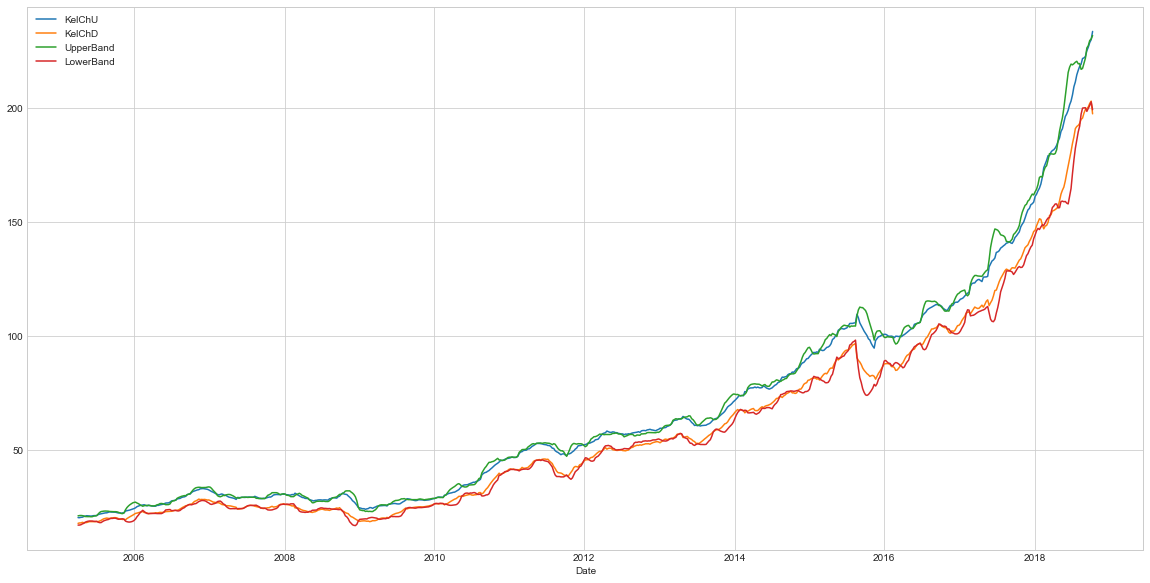

In [13]:
signal, check= SQUEEZE(weekly_last['INTU'], tick , H_price_name='Adj High', L_price_name='Adj Low', C_price_name='Adj Close')
check[['KelChU', 'KelChD', 'UpperBand', 'LowerBand']].iloc[:].plot(figsize = (20, 10))

In [14]:
#test buy in
buy_in = pd.DataFrame(data = np.zeros((len(total_adj), len(total_adj.columns))), index = total_adj.index[:], columns = total_adj.columns)
for tick in range(0, pos_num):
    for check in range(0, len(total_adj)):
        if squeeze_info.iloc[check-1,tick] == 1 and momentum_info.iloc[check-1,tick]==1  and Nhigh_info.iloc[check-1,tick]==1:
               buy_in.iloc[check,tick]=1


In [15]:
candidate = {}
GOOD = pd.DataFrame()
for check in range(0, len(total_adj)):
    candidate[str(check)] = {}
    target = []
    for tick in range(0, pos_num):
        if buy_in.iloc[check-1,tick] == 1:
            target.append(ticker[tick])
            candidate[str(check)].update({total_adj.index[check]:target})      
    candidate_list = pd.DataFrame()
    for symbol in candidate[str(check)].keys(): 
        symbol_transaction = pd.DataFrame(candidate[str(check)][symbol])
        symbol_transaction['time'] = symbol
        candidate_list = pd.concat([candidate_list, symbol_transaction])
    
    if len(candidate_list) > 0:
        GOOD = pd.concat([GOOD , candidate_list],axis = 0)
print(GOOD)

       0       time
0   ALGN 2005-01-09
1     CA 2005-01-09
2   ISRG 2005-01-09
3   SHPG 2005-01-09
4   TTWO 2005-01-09
5   VRTX 2005-01-09
0   CTRP 2006-01-29
1   QCOM 2006-01-29
0     CA 2006-02-05
1   COST 2006-02-05
0   IDXX 2006-02-19
1   ISRG 2006-02-19
2   KLAC 2006-02-19
3     MU 2006-02-19
4   ORLY 2006-02-19
5   SBUX 2006-02-19
0   IDXX 2006-02-26
1    MYL 2006-02-26
2   ORLY 2006-02-26
0   JBHT 2006-03-05
1    MYL 2006-03-05
2   ORLY 2006-03-05
0   BMRN 2006-03-12
1   COST 2006-03-12
2   ESRX 2006-03-12
3   FAST 2006-03-12
4   JBHT 2006-03-12
5   ORLY 2006-03-12
0   BIIB 2006-03-19
0   CDNS 2006-03-26
..   ...        ...
4   MSFT 2018-06-03
5   NVDA 2018-06-03
0   JBHT 2018-06-10
0    FOX 2018-06-17
1   FOXA 2018-06-17
0   VRSK 2018-07-01
0   ASML 2018-07-08
1   VRSK 2018-07-08
0   SHPG 2018-07-29
0   CTXS 2018-08-05
1   ULTA 2018-08-05
0   ASML 2018-08-12
1     FB 2018-08-12
0   CTXS 2018-08-19
0   ESRX 2018-09-02
1   TTWO 2018-09-02
0   ADBE 2018-09-16
1   CDNS 2018-09-16


In [16]:
target_total=[]
def target(close):
    candidate = []
    number=0
    for check in range(0, len(close)):
        candidate.append([])
        for tick in range(0, pos_num):
            if buy_in.iloc[check-1,tick] == 1:
                candidate[check].append(ticker[tick])   
    for k in range (len(candidate)):
        if len(candidate[k])>5:
            number+=1
    #print(number)
    return candidate
target_total=target(total_adj)

In [17]:
#設定check
check=58
bb=target_total[check]
#測試自定義函數expect_performance
kk = expect_performance(bb,check) 
display(kk)
h=len(bb)
#測試自定義函數covariance_matrix
hh = covariance_matrix(bb,check)

,IDXX,ISRG,KLAC,MU,ORLY,SBUX
Mean,0.00487926,-0.00946979,0.00517455,0.0068411,0.0201325,-0.00579808
Variance,0.000130236,0.000753927,0.000297361,0.000112356,0.000883002,4.31949e-06
STDev,0.0114121,0.0274577,0.0172442,0.0105998,0.0297154,0.00207834


In [18]:
sol=QP(bb)
for i in range(0, len(bb)-1):
    print(sol['x'][i])
print(sum(sol['x']))

     pcost       dcost       gap    pres   dres
 0:  2.0950e-05 -1.0520e+00  1e+00  1e-16  4e-16
 1:  2.0948e-05 -1.0625e-02  1e-02  2e-16  4e-16
 2:  2.0792e-05 -2.0966e-04  2e-04  6e-17  1e-17
 3:  1.3421e-05 -1.1284e-05  2e-05  3e-17  4e-19
 4:  6.3286e-06  2.2108e-06  4e-06  1e-16  4e-20
 5:  4.1079e-06  3.7526e-06  4e-07  2e-16  1e-20
 6:  3.8861e-06  3.8594e-06  3e-08  3e-17  2e-20
Optimal solution found.
5.977472630656769e-05
0.005462235103905106
2.7280855493758787e-05
0.3462378486312085
0.1262285231715982
0.4797668073703625


In [19]:
#做資產分配
sub = []
for check in range(0, 698): #runtime  error ,so up to 697
    b=[]
    real = []
    bb=target_total[check]
    if len(bb) >= size:
        print(check)
        kk = expect_performance(bb,check) 
        hh = covariance_matrix(bb,check)
        sol=QP(bb)
        for i in range (len(bb)):
            b.append(sol['x'][i])
        for i in b:
            new = i/sum(sol['x'])
            real.append(new)
        sub.append(real)


0
     pcost       dcost       gap    pres   dres
 0:  1.5081e-05 -1.0559e+00  1e+00  4e-17  2e-16
 1:  1.5080e-05 -1.0581e-02  1e-02  1e-16  3e-16
 2:  1.4952e-05 -1.2764e-04  1e-04  8e-17  7e-18
 3:  9.9721e-06 -7.6756e-06  2e-05  8e-17  7e-19
 4:  6.3222e-06  4.1769e-06  2e-06  1e-16  5e-20
 5:  5.1076e-06  5.0014e-06  1e-07  9e-17  3e-20
 6:  5.0804e-06  5.0793e-06  1e-09  1e-16  3e-20
Optimal solution found.
58
     pcost       dcost       gap    pres   dres
 0:  2.0950e-05 -1.0520e+00  1e+00  1e-16  4e-16
 1:  2.0948e-05 -1.0625e-02  1e-02  2e-16  4e-16
 2:  2.0792e-05 -2.0966e-04  2e-04  6e-17  1e-17
 3:  1.3421e-05 -1.1284e-05  2e-05  3e-17  4e-19
 4:  6.3286e-06  2.2108e-06  4e-06  1e-16  4e-20
 5:  4.1079e-06  3.7526e-06  4e-07  2e-16  1e-20
 6:  3.8861e-06  3.8594e-06  3e-08  3e-17  2e-20
Optimal solution found.
61
     pcost       dcost       gap    pres   dres
 0:  1.4843e-05 -1.0231e+00  1e+00  2e-18  2e-16
 1:  1.4840e-05 -1.0313e-02  1e-02  6e-17  4e-16
 2:  1.4509e-05 

 2:  5.5729e-05 -1.0564e-04  2e-04  2e-16  1e-17
 3:  4.7497e-05  1.5264e-05  3e-05  2e-16  2e-18
 4:  3.5674e-05  3.0515e-05  5e-06  2e-16  6e-20
 5:  3.2934e-05  3.2726e-05  2e-07  3e-16  3e-20
 6:  3.2777e-05  3.2774e-05  2e-09  8e-17  5e-20
Optimal solution found.
332
     pcost       dcost       gap    pres   dres
 0:  1.1411e-04 -1.0421e+00  1e+00  3e-17  2e-16
 1:  1.1410e-04 -1.0396e-02  1e-02  2e-16  1e-16
 2:  1.1317e-04 -7.8958e-05  2e-04  2e-16  3e-18
 3:  8.4283e-05  3.7430e-05  5e-05  8e-17  4e-19
 4:  5.5467e-05  4.0328e-05  2e-05  6e-17  2e-19
 5:  5.2266e-05  5.1691e-05  6e-07  3e-16  2e-19
 6:  5.2016e-05  5.1995e-05  2e-08  4e-17  1e-19
Optimal solution found.
342
     pcost       dcost       gap    pres   dres
 0:  3.1665e-05 -1.0456e+00  1e+00  1e-16  4e-16
 1:  3.1664e-05 -1.0475e-02  1e-02  5e-17  3e-16
 2:  3.1544e-05 -1.2345e-04  2e-04  3e-17  4e-18
 3:  2.6441e-05 -2.6833e-06  3e-05  2e-16  6e-19
 4:  1.9889e-05  1.3187e-05  7e-06  4e-17  1e-19
 5:  1.6341e-05

 1:  4.7592e-06 -1.0127e-02  1e-02  8e-17  6e-16
 2:  4.7066e-06 -1.3853e-04  1e-04  6e-17  1e-17
 3:  2.5859e-06 -1.6573e-05  2e-05  1e-16  2e-18
 4:  1.3222e-07 -4.6338e-06  5e-06  6e-17  2e-20
 5:  4.2194e-09 -2.1768e-07  2e-07  2e-16  1e-20
 6:  1.1884e-12 -3.2775e-09  3e-09  3e-16  4e-21
Optimal solution found.
531
     pcost       dcost       gap    pres   dres
 0:  2.9200e-05 -1.0275e+00  1e+01  3e+00  4e-16
 1:  2.7651e-05 -8.0953e-01  1e+00  6e-02  4e-16
 2:  2.1853e-05 -1.1590e-01  1e-01  6e-03  4e-16
 3:  2.1134e-05 -1.2168e-03  1e-03  5e-05  1e-16
 4:  1.9627e-05 -4.5837e-05  7e-05  3e-06  5e-18
 5:  2.6276e-06 -3.6480e-05  4e-05  3e-17  1e-19
 6:  7.6350e-07 -2.3805e-06  3e-06  3e-16  8e-20
 7:  1.1635e-07 -1.8265e-07  3e-07  2e-16  2e-20
 8:  1.3147e-08 -2.7476e-08  4e-08  1e-16  9e-20
Optimal solution found.
535
     pcost       dcost       gap    pres   dres
 0:  2.1685e-04 -1.1052e+00  1e+01  3e+00  3e-16
 1:  2.0675e-04 -7.4707e-01  8e-01  3e-02  6e-16
 2:  2.0241e-04

In [20]:
sub

[[0.38222061235713883,
  1.2169657322426197e-05,
  3.318772175654548e-06,
  0.3543541447836055,
  0.26340524975247387,
  4.504677283813718e-06],
 [0.0001245912084543685,
  0.01138518759529035,
  5.686274055366019e-05,
  0.721679456169475,
  0.2631039105507655,
  0.0036499917354610597],
 [0.05267248731325981,
  0.5351926906004546,
  0.0015299701628075572,
  0.004157656021247567,
  0.31549963045541274,
  0.09094756544681781],
 [0.2538184580256075,
  5.48824470109551e-05,
  0.7456883836468293,
  0.00014900287513070642,
  6.060617854792975e-05,
  0.00010973267784931632,
  0.00011893414902430453],
 [0.000447144099747628,
  0.0106149657905342,
  0.14279043734848926,
  0.8403574816506891,
  0.0015392279204973036,
  0.0014214640626529374,
  0.0006299582816460467,
  0.0021993208457435345],
 [0.489154987603834,
  0.4679125281597522,
  0.00015402907219358566,
  2.142058120328941e-05,
  0.0427570345830169],
 [0.0009422503286351102,
  0.3635088495739427,
  0.005346812543514781,
  0.0040617785307078

In [21]:
buy_target = pd.DataFrame(data = np.zeros((len(total_adj), len(total_adj.columns))), index = total_adj.index[:], columns = total_adj.columns)
buy_in = pd.DataFrame(data = np.zeros((len(total_adj), len(total_adj.columns))), index = total_adj.index[:], columns = total_adj.columns)
for check in range(0, 697):
    
    b=[]
    real = []
    bb=target_total[check]
    if len(bb)>=size:
        print(check)
        kk = expect_performance(bb,check) 
        hh = covariance_matrix(bb,check)
        sol=QP(bb)
        for i in range (len(bb)):
            b.append(sol['x'][i])
        for i in b:
            new = i/sum(sol['x'])
            real.append(new)
            
    for tick in range(0, pos_num):  
        if len(target_total[check]) > size:
            if ticker[tick] in target_total[check]:
                buy_target[ticker[tick]][check] = real[(target_total[check]).index(str(ticker[tick]))]            
        if squeeze_info.iloc[check-1,tick] == 1 and momentum_info.iloc[check-1,tick]==1  and Nhigh_info.iloc[check-1,tick]==1:
               buy_in.iloc[check,tick]=1

0
     pcost       dcost       gap    pres   dres
 0:  1.5081e-05 -1.0559e+00  1e+00  4e-17  2e-16
 1:  1.5080e-05 -1.0581e-02  1e-02  1e-16  3e-16
 2:  1.4952e-05 -1.2764e-04  1e-04  8e-17  7e-18
 3:  9.9721e-06 -7.6756e-06  2e-05  8e-17  7e-19
 4:  6.3222e-06  4.1769e-06  2e-06  1e-16  5e-20
 5:  5.1076e-06  5.0014e-06  1e-07  9e-17  3e-20
 6:  5.0804e-06  5.0793e-06  1e-09  1e-16  3e-20
Optimal solution found.
58
     pcost       dcost       gap    pres   dres
 0:  2.0950e-05 -1.0520e+00  1e+00  1e-16  4e-16
 1:  2.0948e-05 -1.0625e-02  1e-02  2e-16  4e-16
 2:  2.0792e-05 -2.0966e-04  2e-04  6e-17  1e-17
 3:  1.3421e-05 -1.1284e-05  2e-05  3e-17  4e-19
 4:  6.3286e-06  2.2108e-06  4e-06  1e-16  4e-20
 5:  4.1079e-06  3.7526e-06  4e-07  2e-16  1e-20
 6:  3.8861e-06  3.8594e-06  3e-08  3e-17  2e-20
Optimal solution found.
61
     pcost       dcost       gap    pres   dres
 0:  1.4843e-05 -1.0231e+00  1e+00  2e-18  2e-16
 1:  1.4840e-05 -1.0313e-02  1e-02  6e-17  4e-16
 2:  1.4509e-05 

384
     pcost       dcost       gap    pres   dres
 0:  1.4895e-05 -1.0763e+00  1e+00  3e-17  2e-16
 1:  1.4894e-05 -1.0787e-02  1e-02  2e-16  7e-16
 2:  1.4819e-05 -1.3151e-04  1e-04  1e-16  2e-17
 3:  1.1080e-05 -1.1912e-05  2e-05  1e-16  2e-18
 4:  5.2153e-06  8.3888e-07  4e-06  3e-16  2e-19
 5:  2.7216e-06  1.8324e-06  9e-07  2e-16  2e-20
 6:  2.3389e-06  2.3014e-06  4e-08  3e-16  1e-20
Optimal solution found.
391
     pcost       dcost       gap    pres   dres
 0:  3.4162e-05 -1.1087e+00  1e+00  1e-16  5e-16
 1:  3.4161e-05 -1.1089e-02  1e-02  2e-16  3e-16
 2:  3.4065e-05 -1.1257e-04  1e-04  1e-16  4e-18
 3:  2.9064e-05  4.3166e-06  2e-05  9e-17  7e-19
 4:  2.0601e-05  1.6812e-05  4e-06  1e-16  9e-20
 5:  1.9376e-05  1.9076e-05  3e-07  1e-16  4e-20
 6:  1.9178e-05  1.9168e-05  9e-09  2e-16  3e-20
Optimal solution found.
432
     pcost       dcost       gap    pres   dres
 0:  1.5719e-05 -1.0656e+00  1e+00  6e-17  3e-16
 1:  1.5718e-05 -1.0671e-02  1e-02  2e-16  7e-16
 2:  1.5673e

     pcost       dcost       gap    pres   dres
 0:  2.1685e-04 -1.1052e+00  1e+01  3e+00  3e-16
 1:  2.0675e-04 -7.4707e-01  8e-01  3e-02  6e-16
 2:  2.0241e-04 -2.1050e-02  2e-02  4e-04  7e-16
 3:  2.0167e-04 -7.9520e-05  3e-04  5e-06  2e-17
 4:  1.7784e-04  1.3352e-04  4e-05  7e-07  3e-18
 5:  1.5596e-04  1.2481e-04  3e-05  4e-07  2e-18
 6:  1.4397e-04  1.4143e-04  3e-06  3e-08  5e-19
 7:  1.4216e-04  1.4213e-04  3e-08  2e-10  2e-19
Optimal solution found.
540
     pcost       dcost       gap    pres   dres
 0:  5.5608e-05 -1.1338e+00  1e+00  6e-17  4e-16
 1:  5.5605e-05 -1.1375e-02  1e-02  2e-16  5e-16
 2:  5.5265e-05 -1.5023e-04  2e-04  2e-16  2e-17
 3:  4.5384e-05  8.0335e-06  4e-05  3e-16  2e-18
 4:  3.6915e-05  2.6956e-05  1e-05  6e-17  3e-19
 5:  3.1214e-05  2.9883e-05  1e-06  1e-16  7e-20
 6:  3.0616e-05  3.0600e-05  2e-08  1e-16  4e-20
Optimal solution found.
544
     pcost       dcost       gap    pres   dres
 0:  2.8297e-05 -1.0943e+00  1e+00  6e-17  5e-16
 1:  2.8295e-05 

In [22]:
port_each_share = pd.DataFrame(data = np.zeros((len(total_adj), len(total_adj.columns))), index = total_adj.index[:], columns = total_adj.columns)
port_each_value = pd.DataFrame(data = np.zeros((len(total_adj), len(total_adj.columns))), index = total_adj.index[:], columns = total_adj.columns)
total_port_value = pd.DataFrame(data = np.zeros((len(total_adj), 1)), index = total_adj.index[:], columns = ['Values'])
#持有資金int

symbols_info = {}
for i in ticker :
    symbols_info.update({i:[]})
out_up = 0
out_do = 0 

for check in range(0, 697):
    out_up = 0
    out_do = 0
    

    for tick in range(0, pos_num):
        if check==0:
            total_port_value.iloc[check]=int_capital          
        else:
            port_each_value[ticker[tick]][check] = total_port_value.iloc[check] * buy_target[ticker[tick]][check]
            if port_each_share.iloc[check-1,tick] < port_each_value.iloc[check,tick] / total_adj.iloc[check,tick]:
                port_each_share.iloc[check,tick] = port_each_value.iloc[check,tick] / total_adj.iloc[check,tick]
                new_buy_info = {
                                    'Buying_Date':total_adj.index[check],
                                    'Buying_Price': total_adj.iloc[check, tick],
                                    'Quantity': port_each_share.iloc[check, tick] - port_each_share.iloc[check-1, tick]
                }
                if  len(symbols_info[ticker[tick]]) == 0: 
                    symbols_info[ticker[tick]].append(new_buy_info)
                else:
                    symbols_info[ticker[tick]].update(new_buy_info)
  
                
                    
            
            
            
            elif port_each_share.iloc[check-1,tick] > port_each_value.iloc[check,tick] / total_adj.iloc[check,tick]:
                    port_each_share.iloc[check,tick] = port_each_value.iloc[check,tick] / total_adj.iloc[check,tick]
                    proceeds = total_adj.iloc[check,tick]*port_each_share.iloc[check-1,tick]
                    port_each_value.iloc[check,tick] = proceeds 
                    new_sell_info = {
                                    'Selling_Date': total_adj.index[check],                                    
                                    'Selling_Price': total_adj.iloc[check, tick],
                                    'Quantity': port_each_share.iloc[check-1, tick] - port_each_share.iloc[check, tick],
                                    'Net_Income':  proceeds - symbols_info[ticker[tick]][-1]['Buying_Price']*port_each_share.iloc[check-1,tick]
                    }
                    symbols_info[ticker[tick]][-1].update(new_sell_info)
                    
            else:
                port_each_share.iloc[check,tick]=port_each_share.iloc[check-1,tick]
                port_each_value.iloc[check,tick]=port_each_value.iloc[check-1,tick]
                
                   

    
    

In [23]:
transaction_info = pd.DataFrame()
for symbol in symbols_info.keys():
    symbol_transaction = pd.DataFrame(symbols_info[symbol])
    symbol_transaction['symbol'] = symbol
    transaction_info = pd.concat([transaction_info, symbol_transaction])
transaction_info.reset_index(inplace = True)
transaction_info.drop('index', axis = 1, inplace = True)
transaction_info

,symbol


In [24]:
performance_matrics(total_port_value)

annual volatility:nan
annual return:-1.0
sharpe ratio:nan
max drawdown:1.0
max down duration:718 days


D:\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
total_adj.index

DatetimeIndex(['2005-01-09', '2005-01-16', '2005-01-23', '2005-01-30',
               '2005-02-06', '2005-02-13', '2005-02-20', '2005-02-27',
               '2005-03-06', '2005-03-13',
               ...
               '2018-08-12', '2018-08-19', '2018-08-26', '2018-09-02',
               '2018-09-09', '2018-09-16', '2018-09-23', '2018-09-30',
               '2018-10-07', '2018-10-14'],
              dtype='datetime64[ns]', name='Date', length=719, freq='W-SUN')

# brief review

***********買賣已完成，還差績效檢測*****************